<a href="https://colab.research.google.com/github/DataRobot333/customerchurnprediction/blob/main/MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA

## importing modules


لود کردن کتابخانه های مورد نیاز

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


## loading the data


لود کردن داده ها

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DataRobot333/customerchurnprediction/main/data/datasets_753018_1301349_Customer%20Churn.csv')
df.head(3)

Call  Failure  Complains  Subscription  Length  ...         FN       FP  Churn
0              8          0                    38  ...   177.8760   69.764      0
1              0          0                    39  ...    41.4315   60.000      0
2             10          0                    37  ...  1382.8680  203.652      0

[3 rows x 16 columns]

## data visulization and analysis


ستون ها نشان دهنده ویژگی های استفاده شده برای جمع آوری داده ها است که دارای ۱۶ مورد به شرح زیر است

In [ ]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'FN', 'FP', 'Churn'],
      dtype='object')

In [ ]:
len(df.columns)

16

In [ ]:
df.describe()

Call  Failure    Complains  ...           FP        Churn
count    3150.000000  3150.000000  ...  3150.000000  3150.000000
mean        7.627937     0.076508  ...    98.304688     0.157143
std         7.263886     0.265851  ...    50.724492     0.363993
min         0.000000     0.000000  ...    60.000000     0.000000
25%         1.000000     0.000000  ...    61.380125     0.000000
50%         6.000000     0.000000  ...    72.848000     0.000000
75%        12.000000     0.000000  ...   128.838875     0.000000
max        36.000000     1.000000  ...   266.528000     1.000000

[8 rows x 16 columns]

در جدول فوق میانگین - انحراف معیار - بشترین و کمترین و چارک ها مشخص شده است که بازه و مقدار اعداد را در هر ویژگی به مامیدهد

In [ ]:
df.shape

(3150, 16)

دیتا از ۳۱۵۰ مورد با ۱۶ ویژگی تشکیل شده است

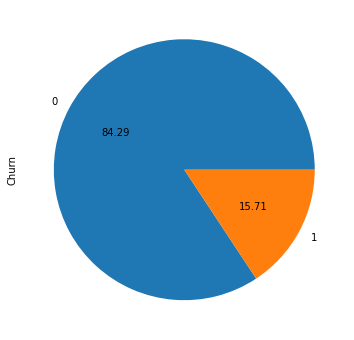

In [ ]:
fig = df['Churn'].value_counts().plot(kind='pie',autopct='%.2f',figsize=(6,6)).get_figure()
fig.savefig('pie_.png')

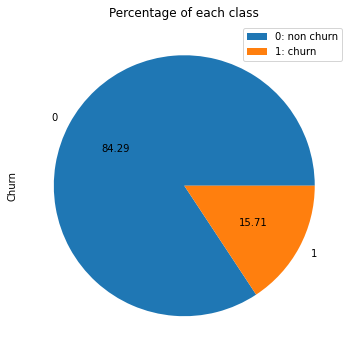

In [ ]:
fig, ax = plt.subplots()
df['Churn'].value_counts().plot(kind='pie',autopct='%.2f',figsize=(6,6),title='Percentage of each class', legend=True, ax =ax)
ax.legend(['0: non churn', '1: churn'])
fig.savefig('impr_pie.png')

پیش بینی های ما بر اساس ستون اخر یعنی شکست ها است که مقدار آن در پای چارت بالا مورد مشاهده است  
84.29 مشتریان عادی  
۱۵.۷۱ مشتریان شکست

In [ ]:
df.Churn.value_counts()

0    2655
1     495
Name: Churn, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


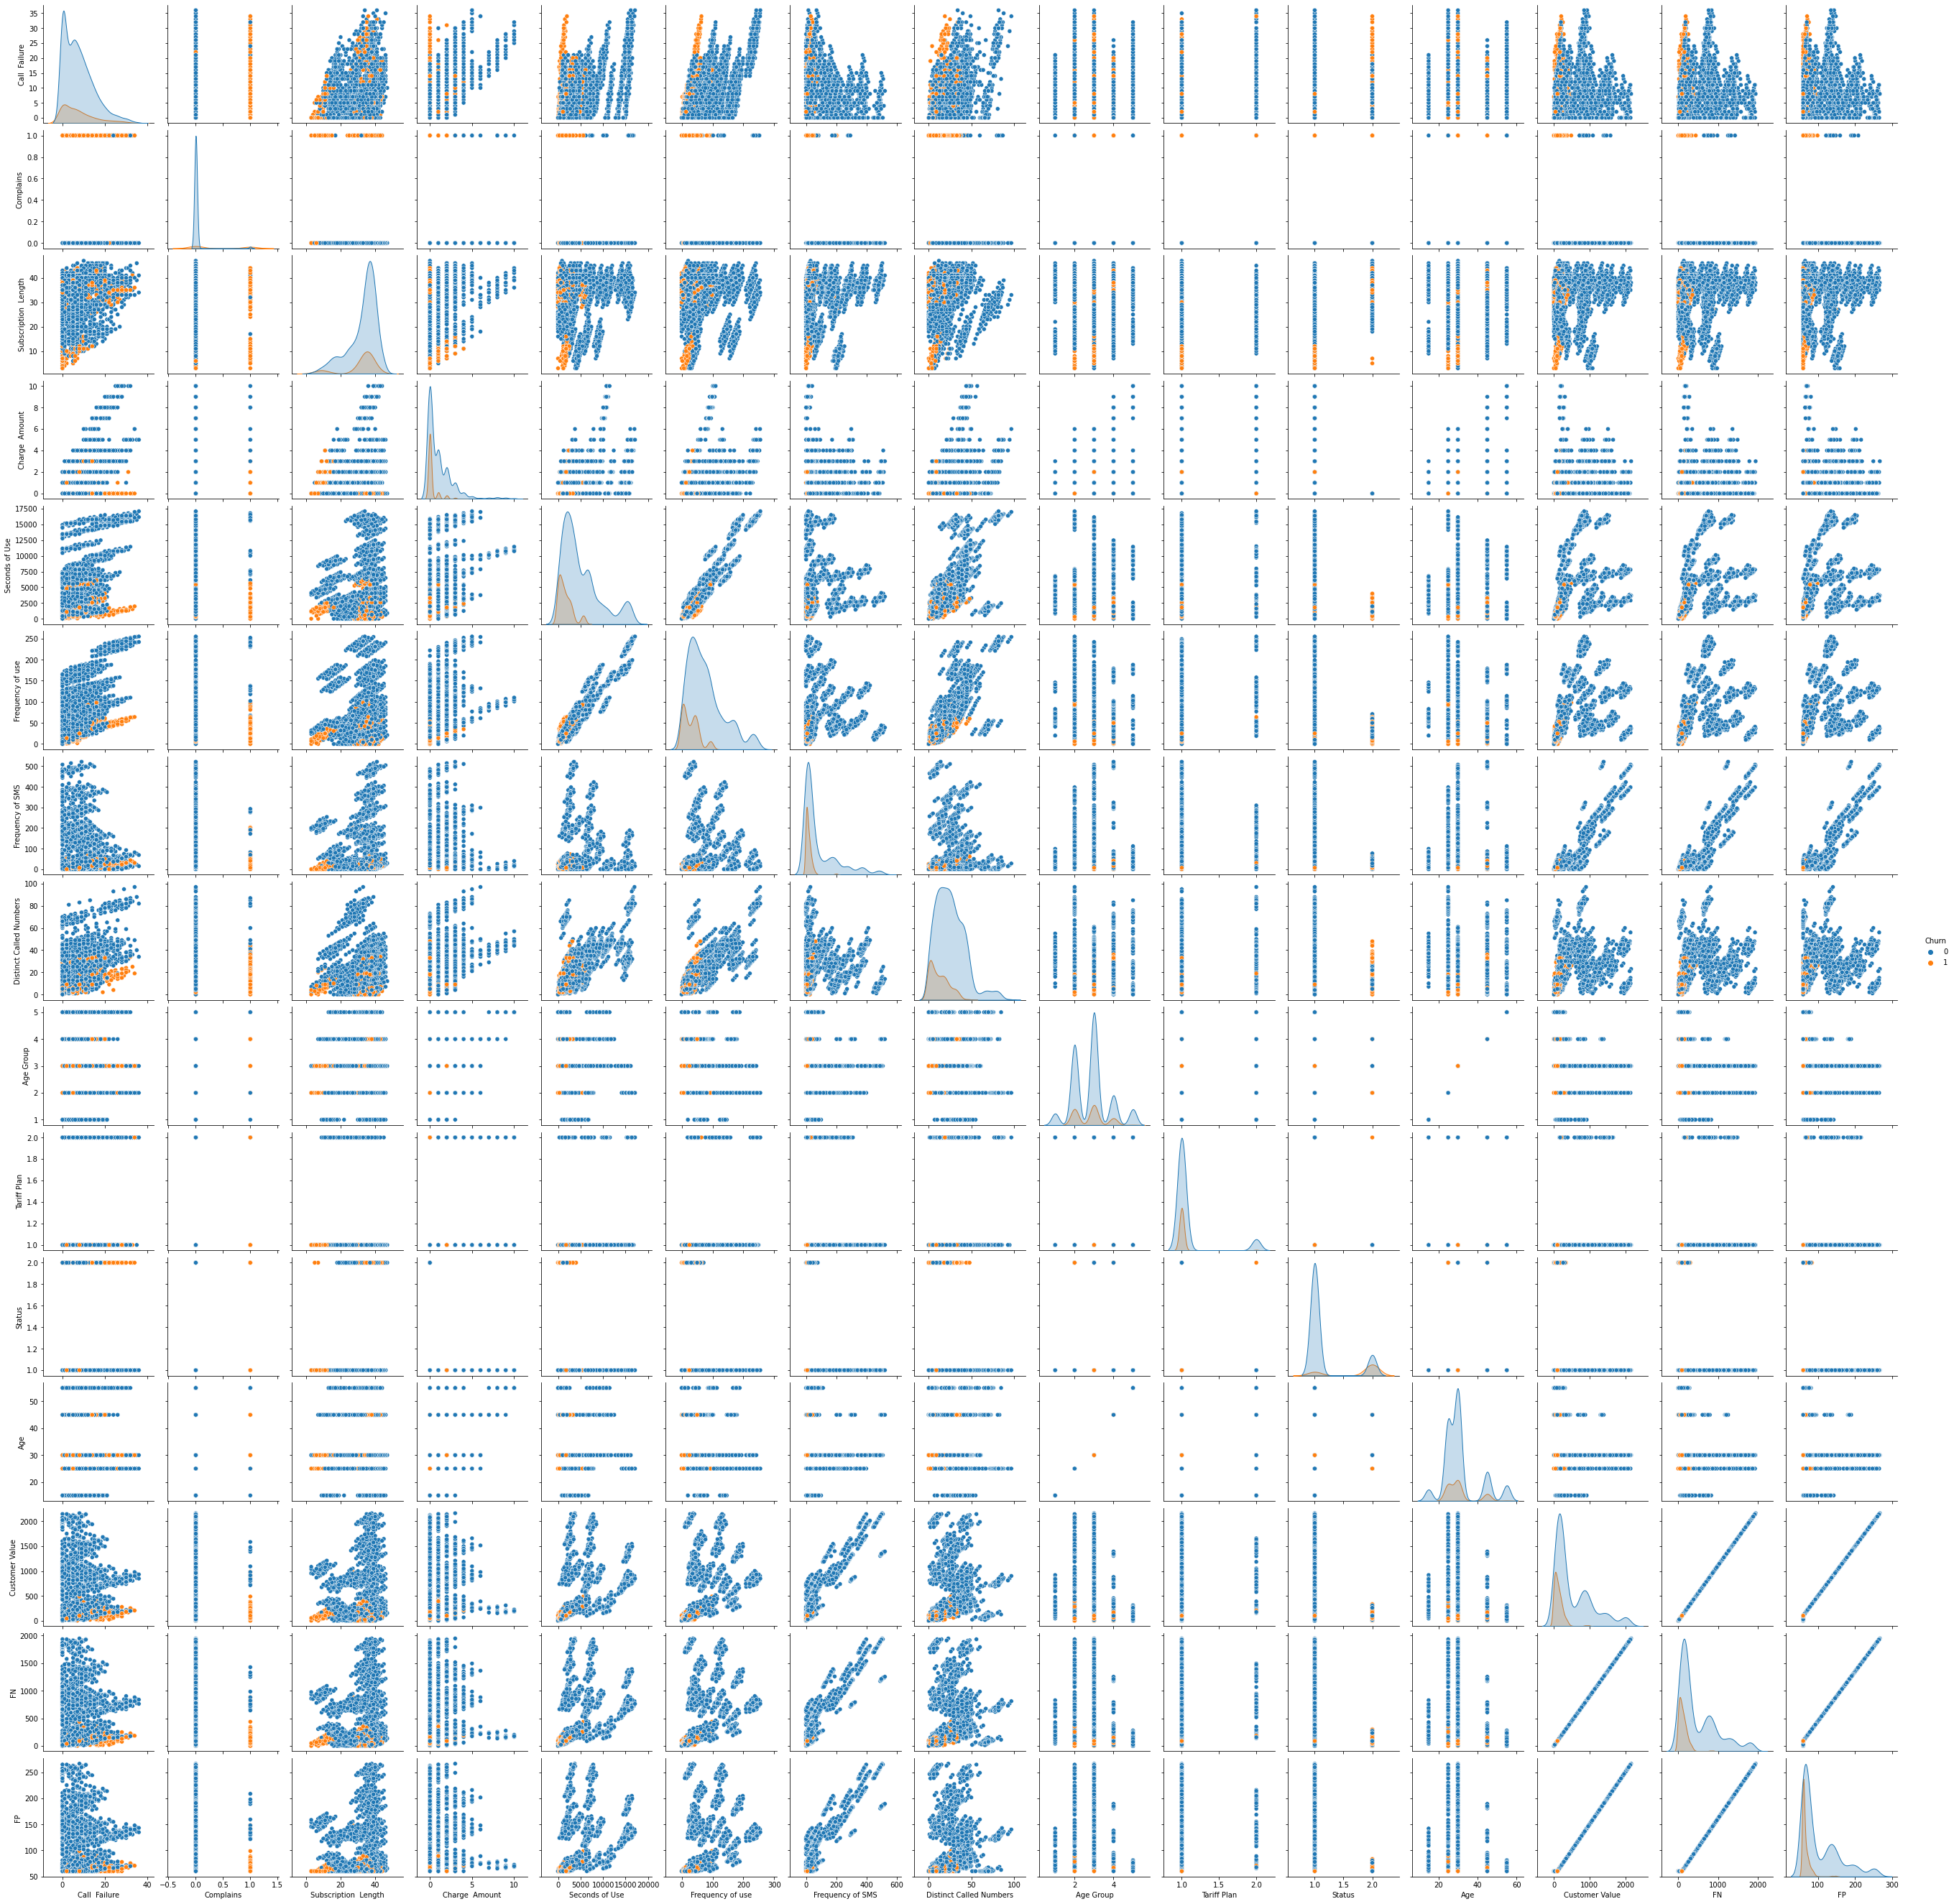

In [ ]:
sns_plot = sns.pairplot(df, hue='Churn',size=2.5)
sns_plot.savefig("output.png")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


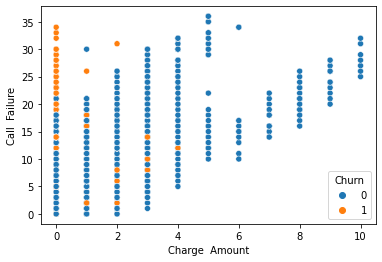

In [ ]:
diag1 = sns.scatterplot(df['Charge  Amount'], df['Call  Failure'], hue=df['Churn'])
diag1.figure.savefig("diag1.png")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


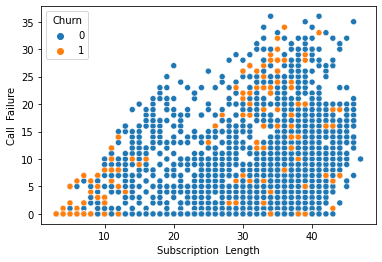

In [ ]:
diag2 = sns.scatterplot(df['Subscription  Length'], df['Call  Failure'], hue=df['Churn'])
diag2.figure.savefig("diag2.png")

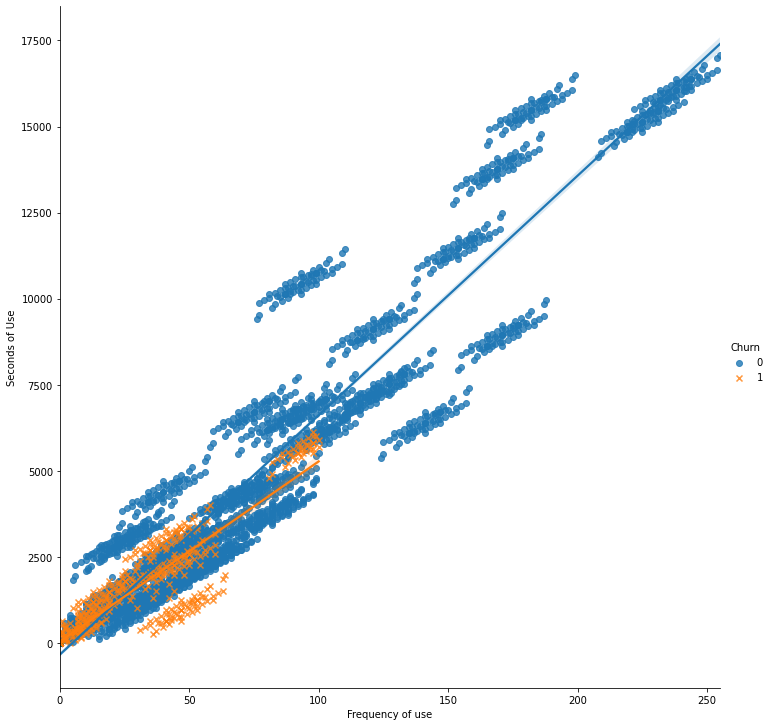

In [ ]:
diag3 = sns.lmplot(x='Frequency of use', y='Seconds of Use',hue = 'Churn', data= df,markers=["o", "x"], height = 10 )
diag3.savefig('diag3.png')

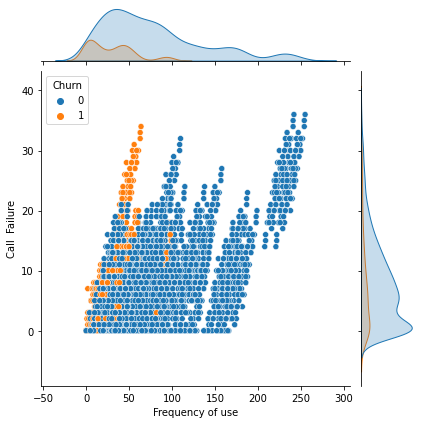

In [ ]:
diag4 = sns.jointplot(x = 'Frequency of use', y = 'Call  Failure',data = df ,hue='Churn')
diag4.savefig('diag4.png')

## data preprocessing

In [ ]:
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

In [ ]:
train_label = np.array(train.pop("Churn"))
train_label

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
def val_count(array):
    zero = 0
    one = 0
    for i in range(len(array)):
        if train_label[i] == 0:
            zero += 1
        else:
            one += 1
    return zero , one

In [ ]:
zero_train, one_train = val_count(train_label)
zero_train, one_train

(1680, 336)

In [ ]:
zero_val, one_val = val_count(val)
zero_val, one_val

(429, 75)

In [ ]:
zero_test, one_test = val_count(test)
zero_test, one_test

(532, 98)

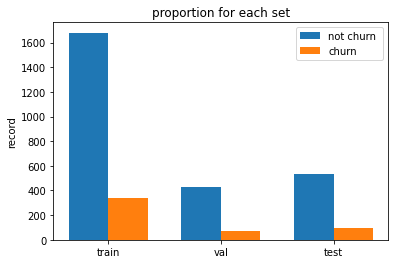

In [ ]:
labels = ['train', 'val', 'test',]
zeros = [zero_train, zero_val, zero_test,]
ones = [one_train, one_val, one_test,]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, zeros, width, label='not churn ')
rects2 = ax.bar(x + width/2, ones, width, label='churn')

ax.set_ylabel('record')
ax.set_title('proportion for each set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.savefig('fig.png')

In [ ]:
val_label = np.array(val.pop("Churn"))
val_label.shape

(504,)

In [ ]:

test_label = np.array(test.pop("Churn"))
test_label.shape

(630,)

In [ ]:
train_feature = np.array(train)
val_feature = np.array(val)
test_feature = np.array(test)
test_feature.shape

(630, 15)

In [ ]:
ss = sklearn.preprocessing.StandardScaler()

train_feature = ss.fit_transform(train_feature)
val_feature = ss.transform(val_feature)
test_feature = ss.transform(test_feature)


In [ ]:
train_feature = np.clip(train_feature,-4,4)
val_feature = np.clip(val_feature,-4,4)
test_feature = np.clip(test_feature,-4,4)

In [ ]:
print('Training labels shape:', train_label.shape)
print('Validation labels shape:', val_label.shape)
print('Test labels shape:', test_label.shape)

print('Training features shape:', train_feature.shape)
print('Validation features shape:', val_feature.shape)
print('Test features shape:', test_feature.shape)

Training labels shape: (2016,)
Validation labels shape: (504,)
Test labels shape: (630,)
Training features shape: (2016, 15)
Validation features shape: (504, 15)
Test features shape: (630, 15)


In [ ]:
100 - ((495/3150)*100) # baseline for classification

84.28571428571429

## data visualization

In [ ]:
corr_mat = df.corr()
print(corr_mat)

                         Call  Failure  Complains  ...        FP     Churn
Call  Failure                 1.000000   0.152879  ...  0.105301 -0.008987
Complains                     0.152879   1.000000  ... -0.134295  0.532053
Subscription  Length          0.169737  -0.020286  ...  0.109536 -0.032588
Charge  Amount                0.589028  -0.033948  ...  0.160595 -0.202305
Seconds of Use                0.501607  -0.104952  ...  0.400114 -0.298935
Frequency of use              0.573349  -0.090774  ...  0.384042 -0.303337
Frequency of SMS             -0.022282  -0.111633  ...  0.927923 -0.220754
Distinct Called Numbers       0.504058  -0.058199  ...  0.264553 -0.278867
Age Group                     0.050406   0.019976  ... -0.182912 -0.014550
Tariff Plan                   0.192285   0.001140  ...  0.250244 -0.105853
Status                       -0.114645   0.271405  ... -0.397140  0.498976
Age                           0.041758   0.003298  ... -0.217394 -0.017705
Customer Value           

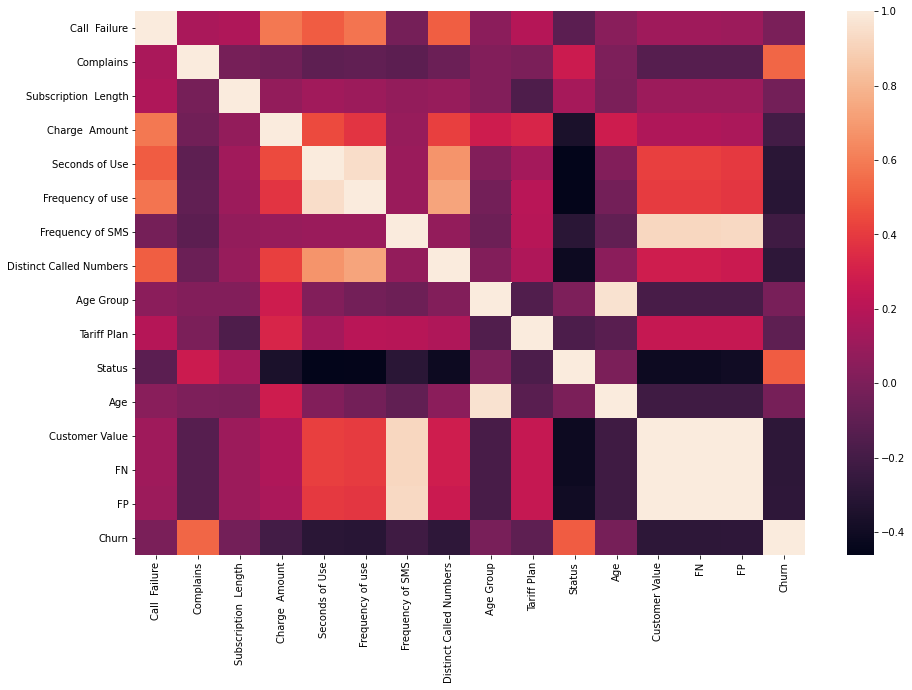

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_mat,)

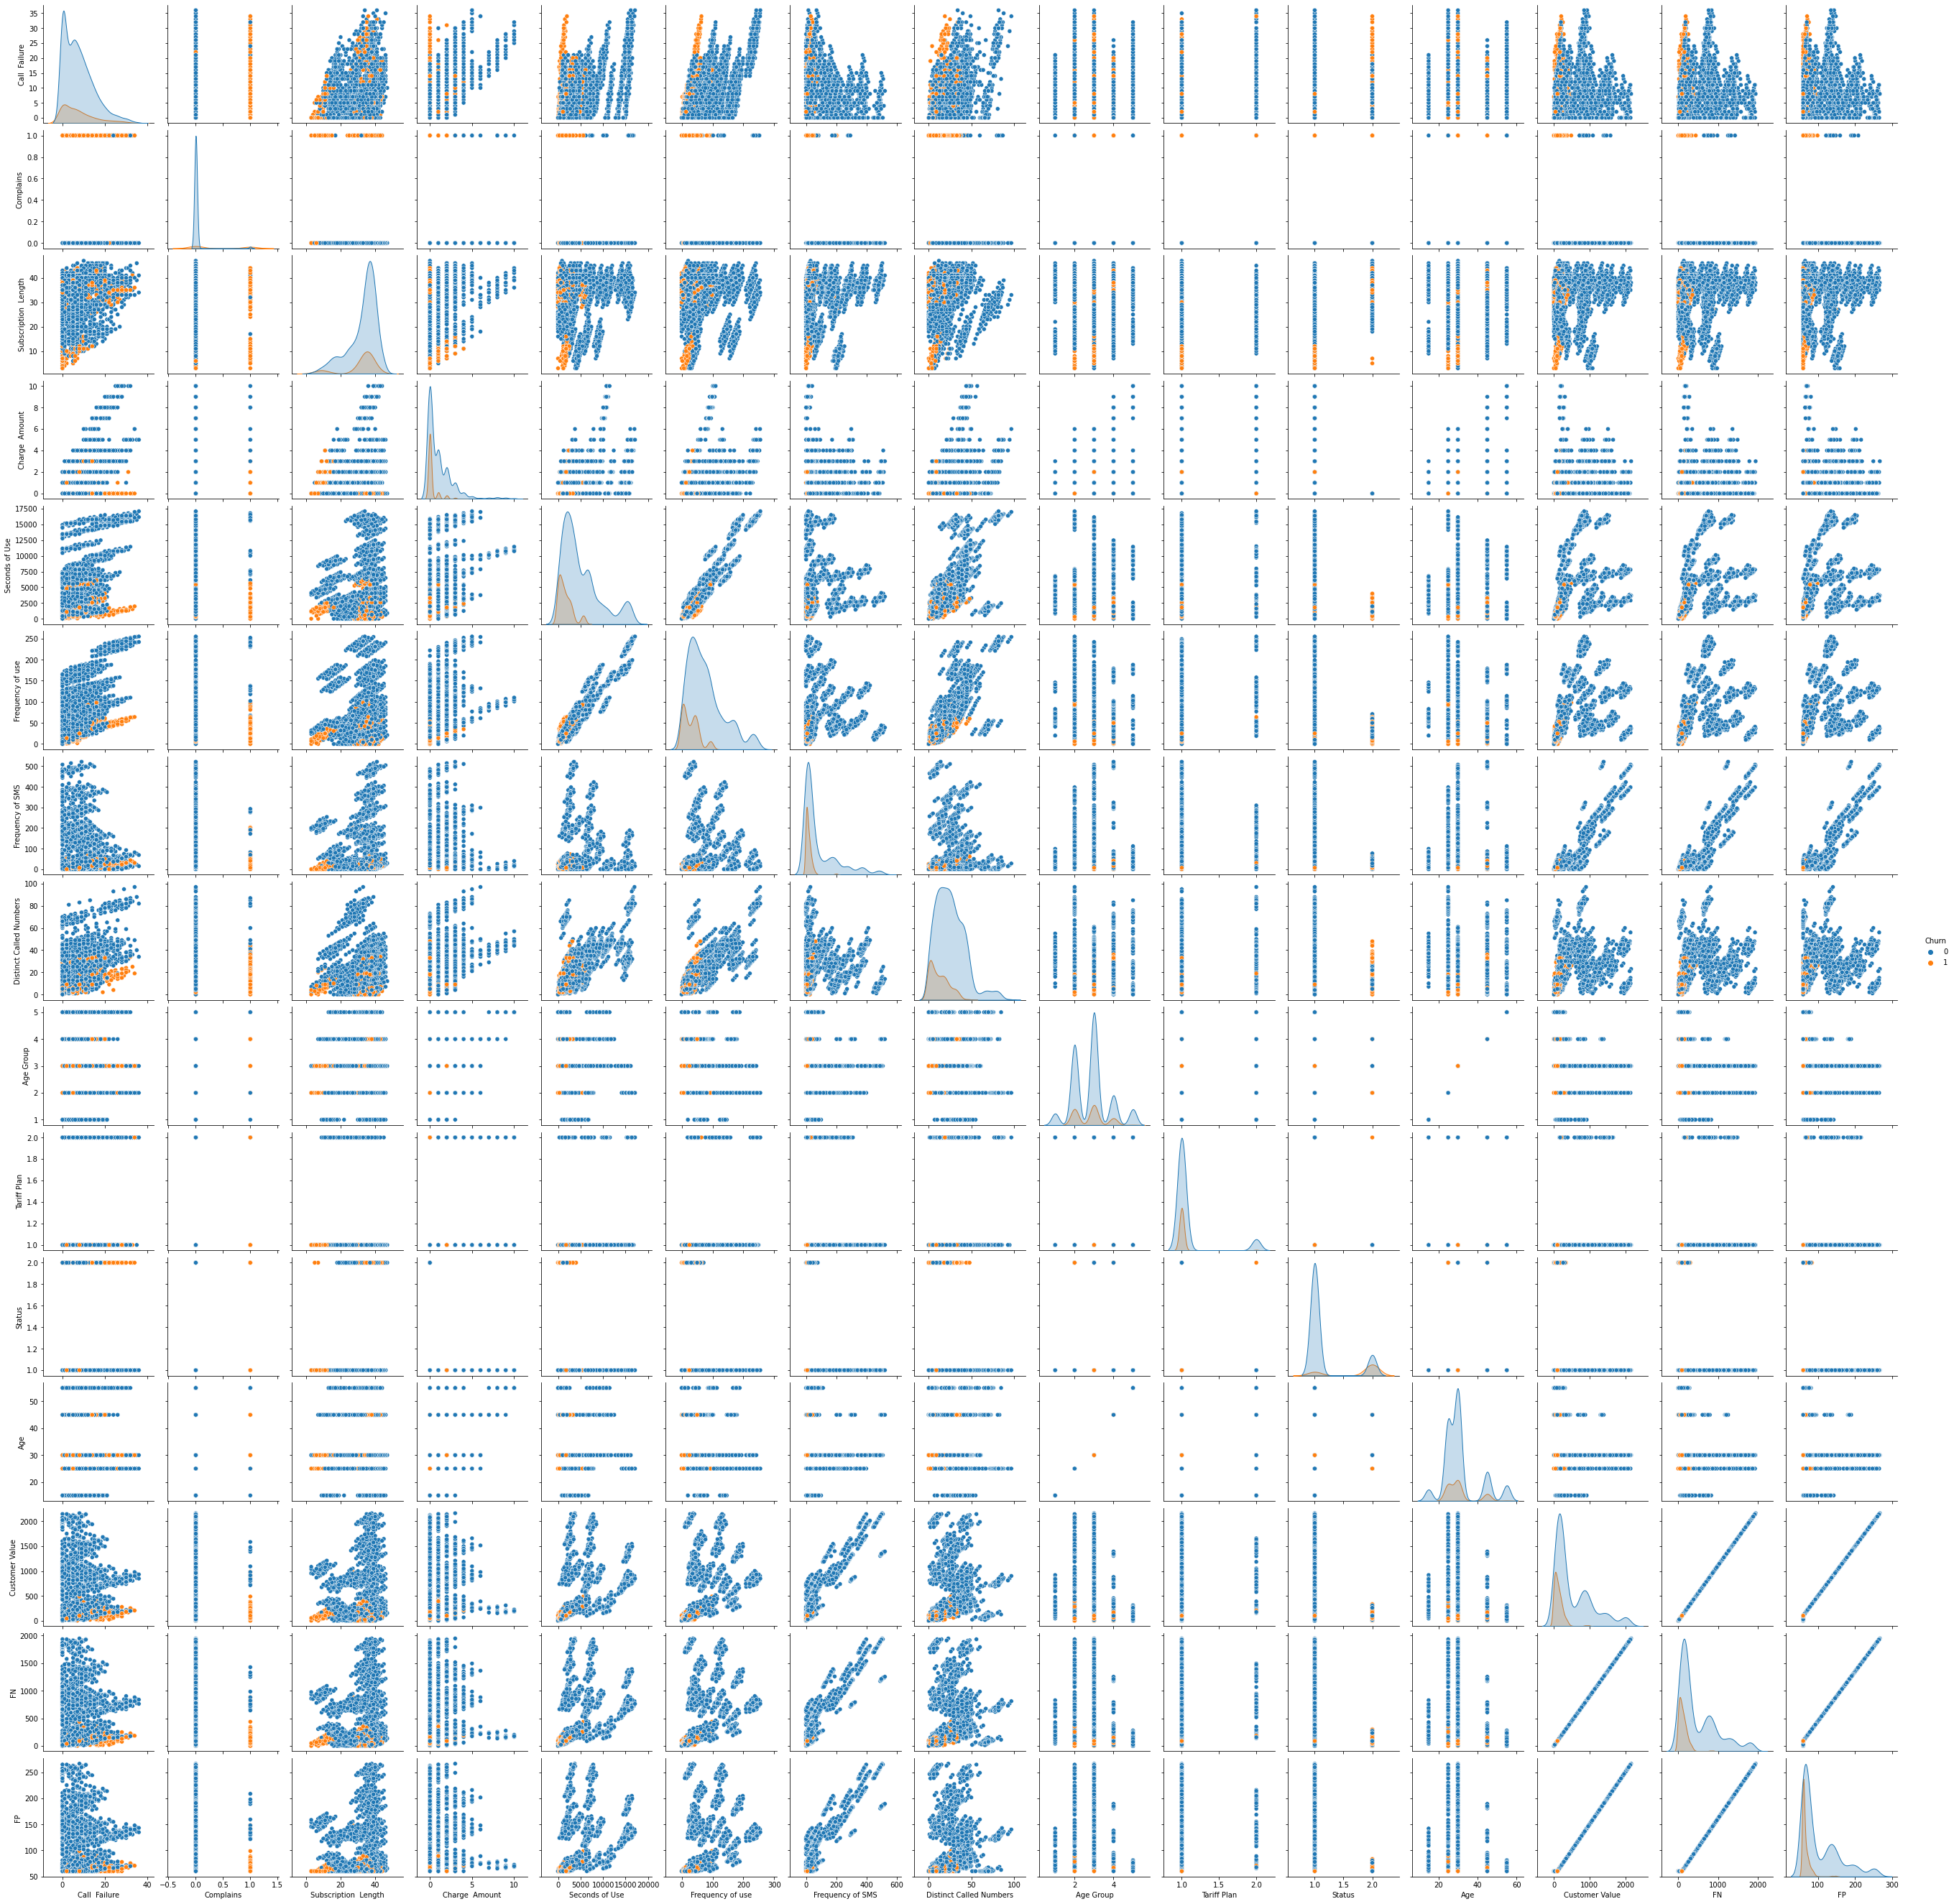

In [ ]:
sns.pairplot(df,hue='Churn')

# MODELS

## linear regression

ابتدا الگوریتم رگرسیون لجستیک را از کتابخانه سایکیت لرن فرا خوانی میکنیم

In [ ]:
from sklearn.linear_model import LogisticRegression

سپس داده های یادگیری و لیبل های این داده ها را برای یادگیری در اختیار الگوریتم قرار میدهیم. 

In [ ]:
clf = LogisticRegression(random_state=0).fit(train_feature,train_label)

بعد از فرایند یادگیری میتوان با استفاده از دستور امتیاز میزان دقت این الگوریتم را اندازه گیری نماییم


In [ ]:
clf.score(val_feature,val_label)

0.9007936507936508

In [ ]:
clf.coef_

array([[ 0.78488094,  1.08991505, -0.22367662, -0.61715846,  0.46483112,
        -1.85120258, -1.87298241, -0.36103394,  0.01046807,  0.02333717,
         0.64859687, -0.08873427, -0.096149  , -0.096149  ,  1.23083209]])

### evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_lr = clf.predict(test_feature)
confusion_matrix(test_label, y_pred_lr)

array([[525,   9],
       [ 58,  38]])

In [ ]:
sklearn.metrics.precision_score(test_label, y_pred_lr)

0.8085106382978723

In [ ]:
sklearn.metrics.recall_score(test_label, y_pred_lr)

0.3958333333333333

In [ ]:
sklearn.metrics.f1_score(test_label,y_pred_lr)

0.5314685314685313

In [ ]:
sklearn.metrics.roc_auc_score(test_label, y_pred_lr)

0.6894897003745318

In [ ]:
clf.coef_

array([[ 0.72035138,  1.04232089, -0.22002654, -0.60312598,  0.52469337,
        -1.83619776, -1.78536477, -0.31114699,  0.08028851, -0.07786761,
         0.52677903, -0.12095524, -0.08493053, -0.08493053,  1.04696939]])

## MLP

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512,activation='relu',input_shape=(15,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               8192      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)]

Metrics = [
           tf.keras.metrics.FalseNegatives(name='fn'),
           tf.keras.metrics.FalsePositives(name='fp'),
           tf.keras.metrics.TruePositives(name='tp'),
           tf.keras.metrics.TrueNegatives(name='tn'),
           tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall'),
           tf.keras.metrics.AUC(name='AUC')
]

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.mean_squared_error,
              metrics=Metrics)

In [ ]:
hist = model.fit(x = train_feature,
                 y = train_label,
                 epochs = 1000,
                 validation_data=(val_feature,val_label),
                 batch_size=60,
                 callbacks=callbacks)

Epoch 1/1000
34/34 [==============================] - 1s 33ms/step - loss: 0.1395 - fn: 286.0000 - fp: 79.0000 - tp: 17.0000 - tn: 1634.0000 - accuracy: 0.8189 - precision: 0.1771 - recall: 0.0561 - AUC: 0.6396 - val_loss: 0.0960 - val_fn: 65.0000 - val_fp: 6.0000 - val_tp: 19.0000 - val_tn: 414.0000 - val_accuracy: 0.8591 - val_precision: 0.7600 - val_recall: 0.2262 - val_AUC: 0.8849
Epoch 2/1000
34/34 [==============================] - 0s 11ms/step - loss: 0.0845 - fn: 217.0000 - fp: 28.0000 - tp: 86.0000 - tn: 1685.0000 - accuracy: 0.8785 - precision: 0.7544 - recall: 0.2838 - AUC: 0.8943 - val_loss: 0.0867 - val_fn: 50.0000 - val_fp: 6.0000 - val_tp: 34.0000 - val_tn: 414.0000 - val_accuracy: 0.8889 - val_precision: 0.8500 - val_recall: 0.4048 - val_AUC: 0.9052
Epoch 3/1000
34/34 [==============================] - 0s 11ms/step - loss: 0.0729 - fn: 154.0000 - fp: 51.0000 - tp: 149.0000 - tn: 1662.0000 - accuracy: 0.8983 - precision: 0.7450 - recall: 0.4917 - AUC: 0.9137 - val_loss: 

### evaluation

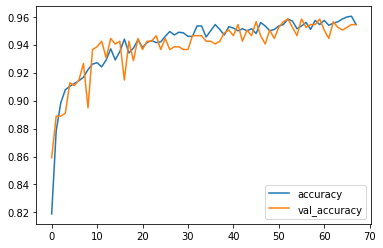

In [ ]:
acc = hist.history['accuracy']
loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

plt.plot(range(len(acc)),acc,label='accuracy')
plt.plot(range(len(acc)),val_acc,label='val_accuracy')
plt.legend()

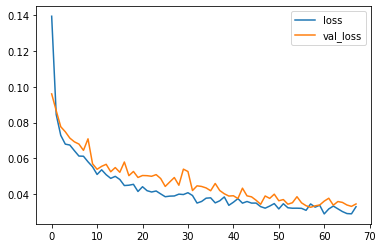

In [ ]:
plt.plot(range(len(acc)),loss,label='loss')
plt.plot(range(len((acc))),val_loss,label='val_loss')
plt.legend()

In [ ]:
def plot_metrics(history):
  metrics =  ['loss', 'AUC', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'AUC':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

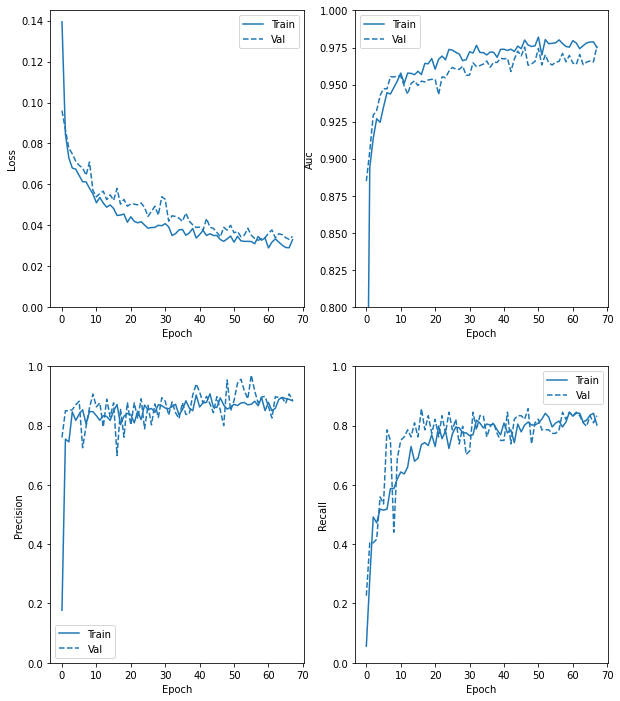

In [ ]:
plt.figure(figsize=(10,12))
plot_metrics(hist)

In [ ]:
y_pred = model.predict(test_feature)

In [ ]:
sklearn.metrics.accuracy_score(test_label,y_pred.round())

0.9603174603174603

In [ ]:
confusion_matrix(test_label,y_pred.round())

array([[510,  12],
       [ 13,  95]])

In [ ]:
sklearn.metrics.precision_score(test_label, y_pred.round())

0.8878504672897196

In [ ]:
sklearn.metrics.recall_score(test_label, y_pred.round())

0.8796296296296297

In [ ]:
sklearn.metrics.f1_score(test_label, y_pred.round())

0.883720930232558

## random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 200,)
rf.fit(train_feature,train_label)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### evaluation

In [ ]:
rf.score(val_feature,val_label)

0.9503968253968254

In [ ]:
sklearn.metrics.accuracy_score(val_label,rf.predict(val_feature))

0.9503968253968254

In [ ]:
confusion_matrix(test_label, rf.predict(test_feature))

array([[508,  12],
       [ 18,  92]])

In [ ]:
rf.feature_importances_

array([0.05850217, 0.19860984, 0.11202622, 0.01605075, 0.10481052,
       0.08796178, 0.041674  , 0.06654898, 0.02720131, 0.0008327 ,
       0.09644423, 0.02604795, 0.06232032, 0.06402189, 0.03694735])

In [ ]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'FN', 'FP', 'Churn'],
      dtype='object')

In [ ]:
sklearn.metrics.precision_score(test_label, rf.predict(test_feature))

0.9148936170212766

In [ ]:
sklearn.metrics.recall_score(test_label, rf.predict(test_feature))

0.7962962962962963

In [ ]:
sklearn.metrics.f1_score(test_label, rf.predict(test_feature))

0.8514851485148516

In [ ]:
sklearn.metrics.roc_auc_score(test_label, rf.predict(test_feature))

0.9066433566433566